In [10]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq
from github import Github, GithubException
import time
from shutil import copyfile
from pymongo import MongoClient
import re
from bson.objectid import ObjectId
import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()
% matplotlib inline

Loading BokehJS ...

In [2]:
client = MongoClient()
db = client['repos-database']
dockers = db['docker_repos']

In [3]:
cursor = dockers.find()
# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))

In [4]:
linguagens = []
dicLinguagens = []
for i in df.itertuples():
    lang = i.Linguagens
    if (lang == None):
        continue
    else:
        lang = lang[0].split(" ")[0].lower()
        if(lang in linguagens):
            index = linguagens.index(lang)
            dicLinguagens[index]['qtd'] = dicLinguagens[index]['qtd'] + 1
        else:
            linguagens.append(lang)
            dicLinguagens.append({"nome":lang, "qtd": 1}) 

In [5]:
dataLinguagens = pd.DataFrame(dicLinguagens,columns=['nome','qtd'])
#dataLinguagens.sort_values('qtd',ascending=False)

In [6]:
imagens = []
dicImagens = []
for i in df.itertuples():
    image = i.Dockerfile
    if (image == None or len(image['FROM']) == 0 ):
        continue
    else:
        image = image['FROM']
        image = image[0].strip()
        if(image in imagens):
            index = imagens.index(image)
            dicImagens[index]['qtd'] = dicImagens[index]['qtd'] + 1
        else:
            imagens.append(image)
            dicImagens.append({"nome":image, "qtd": 1}) 

In [7]:
dataImagens = pd.DataFrame(dicImagens,columns=['nome','qtd'])
#dataImagens.sort_values('qtd',ascending=False)

In [8]:
portas = []
dicPortas = []
def verifyPort(ports):
    for port in ports:
        if(len(str(port).split(" ")) > 1 or len(str(port).split(":")) > 1 or len(str(port).split("/")) > 1):
            continue
        else:
            if(port in portas):
                port = str(port).strip()
                index = portas.index(port)
                dicPortas[index]['qtd'] = dicPortas[index]['qtd'] + 1
            else:
                portas.append(port)
                dicPortas.append({"nome":port, "qtd": 1})
            
for i in df.itertuples():
    port = i.Dockerfile
    if (port == None or len(port['EXPOSE']) == 0 ):
        continue
    else:
        port = port['EXPOSE']
        verifyPort(port)

In [11]:
dataPortas = pd.DataFrame(dicPortas,columns=['nome','qtd'])
#dataPortas.sort_values('qtd',ascending=False)

In [27]:
dataTopImagens = dataImagens.sort_values('qtd',ascending=False).head(10)
dataTopLinguagens = dataLinguagens.sort_values('qtd',ascending=False).head(10)
dataTopPortas = dataPortas.sort_values('qtd',ascending=False).head(10)

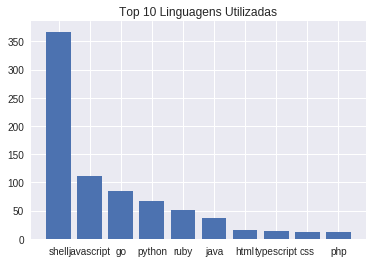

In [49]:
# Top 10 Linguagens
nomes = []
valores = []
for i in dataTopLinguagens.itertuples():
    nomes.append(i.nome)
    valores.append(i.qtd)
    
y_pos = np.arange(len(nomes))
 
plt.bar(y_pos, valores, align='center')
plt.xticks(y_pos, nomes)
plt.title('Top 10 Linguagens Utilizadas')
 
plt.show()


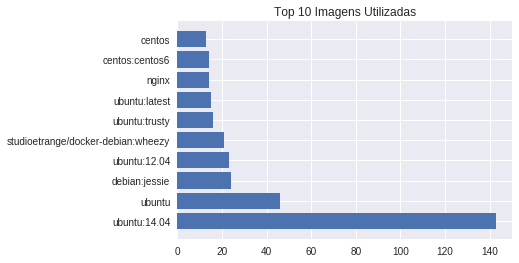

In [54]:
# Top 10 Imagens
nomes = []
valores = []
for i in dataTopImagens.itertuples():
    nomes.append(i.nome)
    valores.append(i.qtd)
    
y_pos = np.arange(len(nomes))
 
plt.barh(y_pos, valores, align='center')
plt.yticks(y_pos, nomes)
plt.title('Top 10 Imagens Utilizadas')
 
plt.show()

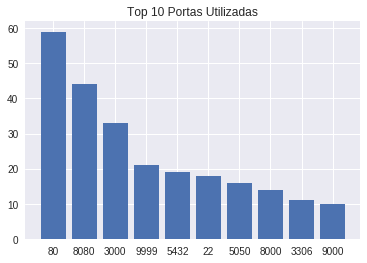

In [52]:
# Top 10 Portas
nomes = []
valores = []
for i in dataTopPortas.itertuples():
    nomes.append(i.nome)
    valores.append(i.qtd)
    
y_pos = np.arange(len(nomes))
 
plt.bar(y_pos, valores, align='center')
plt.xticks(y_pos, nomes)
plt.title('Top 10 Portas Utilizadas')
 
plt.show()